In [1]:
import mne

In [2]:
!pip install osfclient
!pip install mne-bids

You should consider upgrading via the 'd:\python36\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'd:\python36\python.exe -m pip install --upgrade pip' command.


In [53]:
# Load the data
from mne_bids import (BIDSPath,read_raw_bids)

# path where to save the datasets.
bids_root = "local/bids"
subject_id = '002' # recommend subject 2 for now


bids_path = BIDSPath(subject=subject_id,task="P3",session="P3",
                     datatype='eeg', suffix='eeg',
                     root=bids_root)

# read the file
raw = read_raw_bids(bids_path)
# fix the annotations readin
ccs_eeg_utils.read_annotations_core(bids_path,raw)
raw.load_data()

Reading local\bids\sub-002\ses-P3\eeg\sub-002_ses-P3_task-P3_eeg.fdt
Reading events from local\bids\sub-002\ses-P3\eeg\sub-002_ses-P3_task-P3_events.tsv.
The event "response" refers to multiple event values. Creating hierarchical event names.
    Renaming event: response -> response/202
    Renaming event: response -> response/202
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> respo

    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/202


<ipython-input-53-131f02da9da3>:14: RuntimeWarning: Data file name in EEG.data (sub-002_task-P3_eeg.fdt) is incorrect, the file name must have changed on disk, using the correct file name (sub-002_ses-P3_task-P3_eeg.fdt).
  raw = read_raw_bids(bids_path)


    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
    Renaming event: response -> response/201
The event "stimulus" refers to multiple event values. Creating hierarchical event names.
    Renaming event: stimulus -> stimulus/45
    Renaming event: stimulus -> stimulus/45
    Renaming 

    Renaming event: stimulus -> stimulus/14
    Renaming event: stimulus -> stimulus/11
    Renaming event: stimulus -> stimulus/11
    Renaming event: stimulus -> stimulus/13
    Renaming event: stimulus -> stimulus/15
    Renaming event: stimulus -> stimulus/11
    Renaming event: stimulus -> stimulus/14
    Renaming event: stimulus -> stimulus/12
    Renaming event: stimulus -> stimulus/12
    Renaming event: stimulus -> stimulus/14
    Renaming event: stimulus -> stimulus/14
    Renaming event: stimulus -> stimulus/13
    Renaming event: stimulus -> stimulus/13
    Renaming event: stimulus -> stimulus/14
    Renaming event: stimulus -> stimulus/11
    Renaming event: stimulus -> stimulus/14
    Renaming event: stimulus -> stimulus/15
    Renaming event: stimulus -> stimulus/11
    Renaming event: stimulus -> stimulus/13
    Renaming event: stimulus -> stimulus/12
    Renaming event: stimulus -> stimulus/11
    Renaming event: stimulus -> stimulus/15
    Renaming event: stimulus -> 

<ipython-input-53-131f02da9da3>:14: RuntimeWarning: Participants file not found for sub-002_ses-P3_task-P3_eeg.set... Not reading in any particpants.tsv data.
  raw = read_raw_bids(bids_path)


<RawEEGLAB | sub-002_ses-P3_task-P3_eeg.fdt, 33 x 414720 (405.0 s), ~104.4 MB, data loaded>

In [55]:
raw

<RawEEGLAB | sub-002_ses-P3_task-P3_eeg.fdt, 33 x 414720 (405.0 s), ~104.4 MB, data loaded>

In [76]:
raw.info

<Info | 8 non-empty values
 bads: []
 ch_names: FP1, F3, F7, FC3, C3, C5, P3, P7, P9, PO7, PO3, O1, Oz, Pz, CPz, ...
 chs: 30 EEG, 3 EOG
 custom_ref_applied: False
 highpass: 0.0 Hz
 line_freq: 60
 lowpass: 512.0 Hz
 meas_date: unspecified
 nchan: 33
 projs: []
 sfreq: 1024.0 Hz
>

In [57]:
## why one channel has two arrays?
len(raw[0])

2

T: Extract a single channel and plot the whole timeseries. You can directly interact with the raw object, e.g. raw[1:10,1:5000] extracts the first 10 channels and 2000 samples. 

Q: What is the unit/scale of the data (in sense of "range" of data)?  mv

T: Have a look at raw.info and note down what the sampling frequency is (how many EEG-samples per second)
1024HZ

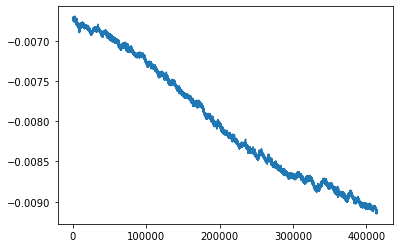

In [75]:
from matplotlib import pyplot as plt
raw_subselect = raw.copy().pick_channels(["Cz"])
plt.plot(raw_subselect[0][0].T)

In [45]:
raw_subselect[0][0].shape

(1, 414720)

In [77]:
print(raw.annotations)

<Annotations | 402 segments: response:201 (198), response:202 (4), ...>


In [78]:
evts,evts_dict = mne.events_from_annotations(raw_subselect)

Used Annotations descriptions: ['response:201', 'response:202', 'stimulus:11', 'stimulus:12', 'stimulus:13', 'stimulus:14', 'stimulus:15', 'stimulus:21', 'stimulus:22', 'stimulus:23', 'stimulus:24', 'stimulus:25', 'stimulus:31', 'stimulus:32', 'stimulus:33', 'stimulus:34', 'stimulus:35', 'stimulus:41', 'stimulus:42', 'stimulus:43', 'stimulus:44', 'stimulus:45', 'stimulus:51', 'stimulus:52', 'stimulus:53', 'stimulus:54', 'stimulus:55']


In [79]:
evts
#sample, the duration and event-id

array([[ 12243,      0,      2],
       [ 14299,      0,      2],
       [ 18819,      0,     22],
       ...,
       [406442,      0,      1],
       [407528,      0,      7],
       [407990,      0,      1]])

In [80]:
evts_dict

{'response:201': 1,
 'response:202': 2,
 'stimulus:11': 3,
 'stimulus:12': 4,
 'stimulus:13': 5,
 'stimulus:14': 6,
 'stimulus:15': 7,
 'stimulus:21': 8,
 'stimulus:22': 9,
 'stimulus:23': 10,
 'stimulus:24': 11,
 'stimulus:25': 12,
 'stimulus:31': 13,
 'stimulus:32': 14,
 'stimulus:33': 15,
 'stimulus:34': 16,
 'stimulus:35': 17,
 'stimulus:41': 18,
 'stimulus:42': 19,
 'stimulus:43': 20,
 'stimulus:44': 21,
 'stimulus:45': 22,
 'stimulus:51': 23,
 'stimulus:52': 24,
 'stimulus:53': 25,
 'stimulus:54': 26,
 'stimulus:55': 27}

In [15]:

# get all keys which contain "stimulus"
wanted_keys = [e for e in evts_dict.keys() if "stimulus" in e]
# subset the large event-dictionairy
evts_dict_stim=dict((k, evts_dict[k]) for k in wanted_keys if k in evts_dict)

Used Annotations descriptions: ['response:201', 'response:202', 'stimulus:11', 'stimulus:12', 'stimulus:13', 'stimulus:14', 'stimulus:15', 'stimulus:21', 'stimulus:22', 'stimulus:23', 'stimulus:24', 'stimulus:25', 'stimulus:31', 'stimulus:32', 'stimulus:33', 'stimulus:34', 'stimulus:35', 'stimulus:41', 'stimulus:42', 'stimulus:43', 'stimulus:44', 'stimulus:45', 'stimulus:51', 'stimulus:52', 'stimulus:53', 'stimulus:54', 'stimulus:55']


In [22]:
evts_dict_stim

{'stimulus:11': 3,
 'stimulus:12': 4,
 'stimulus:13': 5,
 'stimulus:14': 6,
 'stimulus:15': 7,
 'stimulus:21': 8,
 'stimulus:22': 9,
 'stimulus:23': 10,
 'stimulus:24': 11,
 'stimulus:25': 12,
 'stimulus:31': 13,
 'stimulus:32': 14,
 'stimulus:33': 15,
 'stimulus:34': 16,
 'stimulus:35': 17,
 'stimulus:41': 18,
 'stimulus:42': 19,
 'stimulus:43': 20,
 'stimulus:44': 21,
 'stimulus:45': 22,
 'stimulus:51': 23,
 'stimulus:52': 24,
 'stimulus:53': 25,
 'stimulus:54': 26,
 'stimulus:55': 27}

In [81]:
epochs = mne.Epochs(raw_subselect,evts,evts_dict_stim,tmin=-0.1,tmax=1)

Not setting metadata
Not setting metadata
200 matching events found
Setting baseline interval to [-0.099609375, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated


In [82]:
epochs

<Epochs |  200 events (good & bad), -0.0996094 - 1 sec, baseline [-0.0996094, 0] sec, ~6 kB, data not loaded,
 'stimulus:11': 8
 'stimulus:12': 8
 'stimulus:13': 5
 'stimulus:14': 8
 'stimulus:15': 11
 'stimulus:21': 5
 'stimulus:22': 8
 'stimulus:23': 9
 'stimulus:24': 7
 'stimulus:25': 11
 'stimulus:31': 4
 'stimulus:32': 9
 'stimulus:33': 8
 'stimulus:34': 9
 'stimulus:35': 10
 'stimulus:41': 11
 'stimulus:42': 5
 'stimulus:43': 4
 'stimulus:44': 8
 'stimulus:45': 12
 'stimulus:51': 16
 'stimulus:52': 5
 'stimulus:53': 7
 'stimulus:54': 4
 'stimulus:55': 8>

Need more than one channel to make topography for eeg. Disabling interactivity.


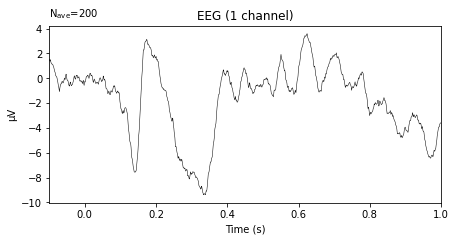

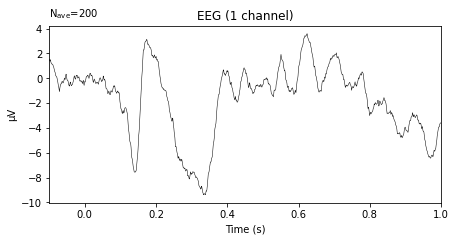

In [83]:
epochs.average().plot()

Loading data for 200 events and 1127 original time points ...
Loading data for 20 events and 1127 original time points ...


d:\python36\lib\site-packages\matplotlib\colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


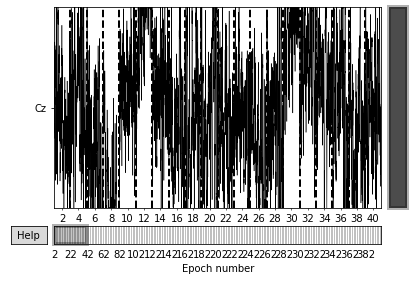

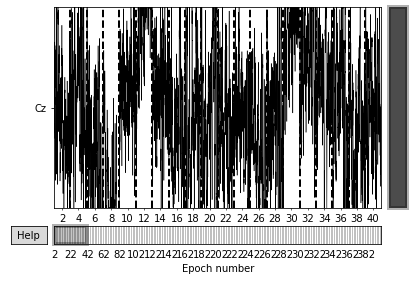

In [86]:
epochs.plot()
## what is epoch number

In [85]:
epochs.get_data().shape

Loading data for 200 events and 1127 original time points ...


(200, 1, 1127)

Loading data for 200 events and 1127 original time points ...
0 bad epochs dropped


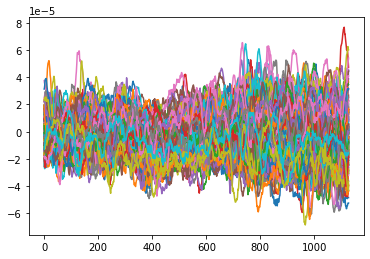

In [84]:
import numpy as np
plt.plot(np.squeeze(epochs.get_data()[:,0,:].T))

<ipython-input-87-781fd4857d8f>:3: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.viz.plot_compare_evokeds([target,distractor])


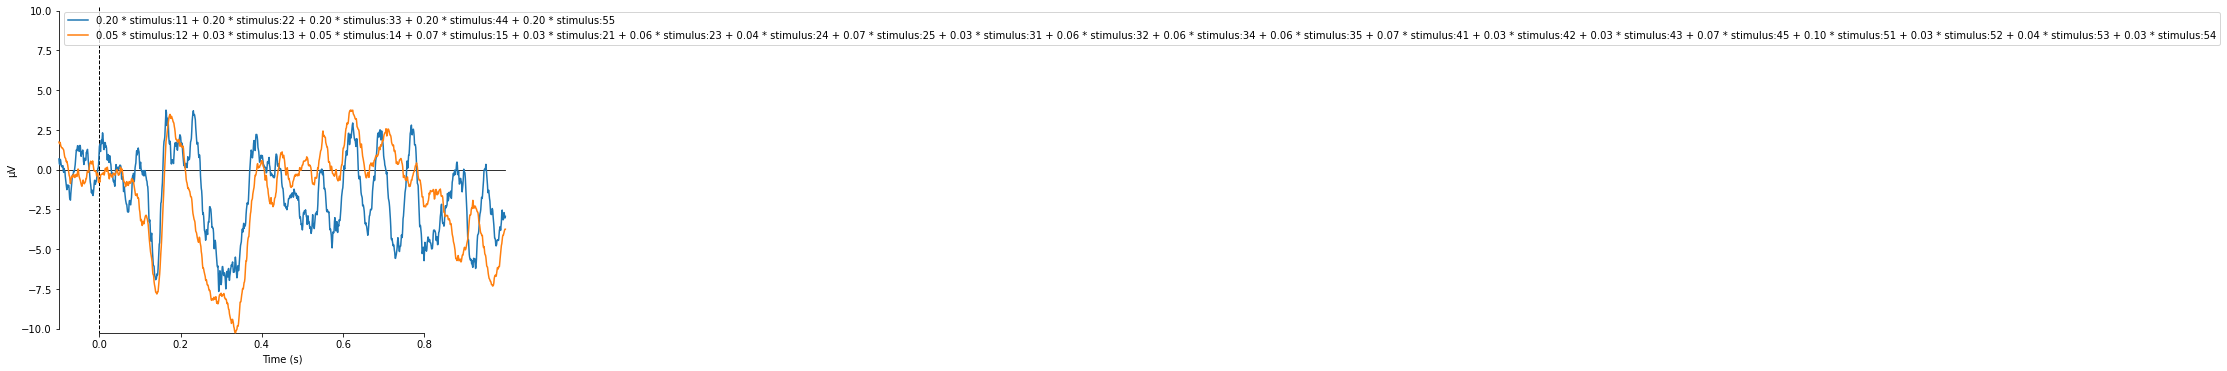

[<Figure size 576x432 with 1 Axes>]

In [87]:

target = epochs[["stimulus:{}{}".format(k,k) for k in [1,2,3,4,5]]].average()
distractor = epochs[["stimulus:{}{}".format(k,j) for k in [1,2,3,4,5] for j in [1,2,3,4,5] if k!=j]].average()
mne.viz.plot_compare_evokeds([target,distractor])

Need more than one channel to make topography for eeg. Disabling interactivity.


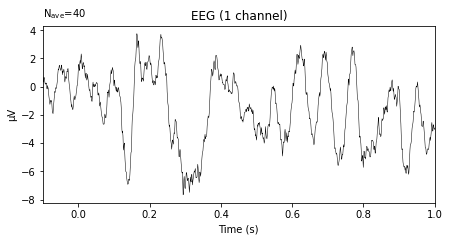

Figure(460.8x216)


In [31]:
print(evoked.plot())